In [4]:
import pandas as pd
import os
import re
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Load functions 

In [5]:
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def abs_cos_vector1(v1, v2):
    return abs(dotproduct(v1, v2) / length(v2))

def calc_force(df):
    df['force'] = df['Fx']**2 + df['Fy']**2 + df['Fz']**2
    df['force'] = df['force'].pow(1/2)
    return df

def calc_velocity(df):
    df['velocity'] = df['Lx']**2 + df['Ly']**2 + df['Lz']
    df['velocity'] = df['velocity'].pow(1/2)
    return df
    
def calc_score(df, factor=2):
    df['score'] = df['front']*df['velocity']/factor
    return df

def time_to_sec(time):
    tmp = time.split(':')
    mins = tmp[0]
    secs = tmp[1]
    return timedelta(minutes=int(mins), seconds=int(secs)).total_seconds()

def find_data(df, uid=None, day=None, exc_num=None, exc_times=None):
    if uid is not None:
        df = df[df['uid']==uid]
        
    if day is not None:
        df = df[df['day']==day]
        
    if exc_num is not None:
        df = df[df['exc_num']==exc_num]
        
    if exc_times is not None:
        df = df[df['exc_times']==exc_times]
        
    return df
#     return df[(df['uid']==uid) & (df['day']==day) & (df['exc_num']==exc_num) & (df['exc_times']==exc_times)]

def del_data(df, uid, day, exc_num, exc_times):
    return df.drop(index= find_data(df, uid, day, exc_num, exc_times).index)
#     return df[(df['uid']!=uid) & (df['day']!=day) & (df['exc_num']!=exc_num) & (df['exc_times']!=exc_times)]

# Diagram 1: Performance improvement throughout the training session week 

## Load dataset

In [53]:
# reorder exc_num
# [day, exc_num]
tmp_d1 = [[1, i+1] for i in xrange(7)]
tmp_d2 = [[2,i+1] for i in xrange(8)]
tmp_d3 = [[3,i+1] for i in xrange(8)]
tmp_d4 = [[4,i+1] for i in xrange(8)]
tmp_d5 = [[5,i+1] for i in xrange(11)]
original_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5
tmp = [1,0,2,3,4,5,6]
tmp_d1 = [[1,i] for i in tmp]
tmp = [2,3,4,6,8,9,10,11]
tmp_d2 = [[2,i] for i in tmp]
tmp = [8,9,10,11,12,13,14,15]
tmp_d3 = [[3,i] for i in tmp]
tmp = [12,13,14,15,16,17,18,19]
tmp_d4 = [[4,i] for i in tmp]
tmp = [12,7,8,9,10,13,14,16,17,18,19]
tmp_d5 = [[5,i] for i in tmp]
reordered_exc_num = tmp_d2 + tmp_d3 + tmp_d4 + tmp_d5


days = ['1_tag/', '2_tag/', '3_tag/', '4_tag/', '5_tag/']
df = pd.DataFrame()
for i, day in enumerate(days):
    data_dir = '../data/old_data/'+day
    filenames = os.listdir(data_dir)
    
    for filename in filenames:
        data_path = data_dir + filename
        df_tmp = pd.read_csv(data_path)
        df_tmp = df_tmp.drop(['Force Input', 'Disturbance Force', 'Velocity','Distance'], axis=1)
        if len(df_tmp)==0:
            df_tmp = pd.concat([df_tmp, df[0:1]])
            df_tmp[0:1] = np.nan


        p = '(^heika)(\d*)(\_)(d)(\d)(\_)(e)(\d*)(\_)(\d)'
        result = re.match(p, filename)
        uid = result.groups()[1]
        d = result.groups()[4]
        exc_num = result.groups()[7]
        exc_times = result.groups()[9]
        
        # replace exc_num
        d = int(d)
        exc_num = int(exc_num)
        exc_times = int(exc_times)
        if [d, exc_num] in original_exc_num:
            index = original_exc_num.index([d, exc_num])
            d, exc_num = reordered_exc_num[index]
            
        df_tmp['day'] = d
        df_tmp['exc_num'] = exc_num
        df_tmp['exc_times'] = exc_times
        df_tmp['uid'] = uid
        
#         df_tmp['force'] = df_tmp['Fx']**2 + df_tmp['Fy']**2 + df_tmp['Fz']**2
#     #     df_tmp['force'] = (df_tmp['Fx']+df_tmp['Fx.1'])**2 + (df_tmp['Fy']+df_tmp['Fy.1'])**2 + (df_tmp['Fz']+df_tmp['Fz.1'])**2
#         df_tmp['force'] = df_tmp['force'].pow(1/2)
    #     df_tmp['disturbance_force'] = df_tmp['Fx.1']**2 + df_tmp['Fy.1']**2 + df_tmp['Fz.1']**2
    #     df_tmp['disturbance_force'] = df_tmp['disturbance_force'].pow(1/2)



    ############# calc force projection on velocity ###############
    #     force_3d = df_tmp[['Fx', 'Fy', 'Fz']].values
    #     velocity_3d = df_tmp[['Lx', 'Ly', 'Lz']].values
    #     score = []
    #     for i in xrange(len(df_tmp)):
    #         score.append(np.dot(force_3d[i], velocity_3d[i]))
    #     df_tmp['force'] = df_tmp['score']/df_tmp['velocity']


    #############  calc length of vector velocity  ####################
#         df_tmp['velocity'] = df_tmp['Lx']**2 + df_tmp['Ly']**2 + df_tmp['Lz']
#         df_tmp['velocity'] = df_tmp['velocity'].pow(1/2)


    ############# calc score   ###################################
    #     df_tmp['score'] = pd.Series(score)
#         df_tmp['score'] = df_tmp['front']*df_tmp['velocity']


    #############################################################################
#         df_tmp = df_tmp.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
#                       'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
        
        df = pd.concat([df, df_tmp])
        
        
# df.to_csv('../data/all_data.csv', index=False)

# df = pd.read_csv('../data/all_data.csv')

## Delete outlier 

In [54]:
df = del_data(df, 1, 4, 12, 2)

## Data processing 

In [56]:
df = calc_force(df)
df = calc_velocity(df)
df = calc_score(df)
df = df.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)

df_nnp = df.dropna()

In [57]:
df_6_3 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_3 = df_6_3.reset_index()
df_6_3_nnp = df_6_3_nnp.reset_index()
# df_6_3 = df_6_3[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3_nnp = df_6_3_nnp[['day', 'exc_num', 'exc_times', 'score']].groupby(['day', 'exc_num', 'exc_times']).mean()
# df_6_3 = df_6_3.reset_index()
# df_6_3_nnp = df_6_3_nnp.reset_index()

first_attempt = df_6_3.groupby(['uid', 'exc_num']).head(1)
first_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_3.groupby(['uid','exc_num']).tail(1)
last_attempt_nnp = df_6_3_nnp.groupby(['uid', 'exc_num']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = df_6_3.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition_nnp = df_6_3_nnp.merge(first_attempt_nnp, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition_nnp = last_repetition_nnp.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition_nnp = last_repetition_nnp.drop(['index', 'exc_times_x', 'exc_times_y', 'score_y'], axis=1)
last_repetition.columns = ['day', 'exc_num', 'uid', 'score']
last_repetition_nnp.columns = ['day', 'exc_num', 'uid', 'score']

first_attempt = first_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = last_attempt[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_attempt_nnp = last_attempt_nnp.reset_index()

last_repetition = last_repetition[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()
last_repetition_nnp = last_repetition_nnp[['exc_num', 'score']].groupby(['exc_num']).mean()
last_repetition_nnp = last_repetition_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on last the training day'
last_repetition['level'] = 'last repetition in the day of the first attempt'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt on the last training day'
last_repetition_nnp['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'score']
df_6_3 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_3_nnp = pd.concat([first_attempt_nnp[cols], last_repetition_nnp[cols], last_attempt_nnp[cols]])
df_6_3_nnp.head()

,exc_num,level,score
0,1,first attempt,49.017001
1,2,first attempt,13.551276
2,3,first attempt,17.580101
3,4,first attempt,62.329893
4,5,first attempt,97.011338
5,6,first attempt,56.176334
6,7,first attempt,28.668774
7,8,first attempt,158.991648
8,9,first attempt,145.902881
9,10,first attempt,291.503817


[Text(0.5,0,'exercise index')]

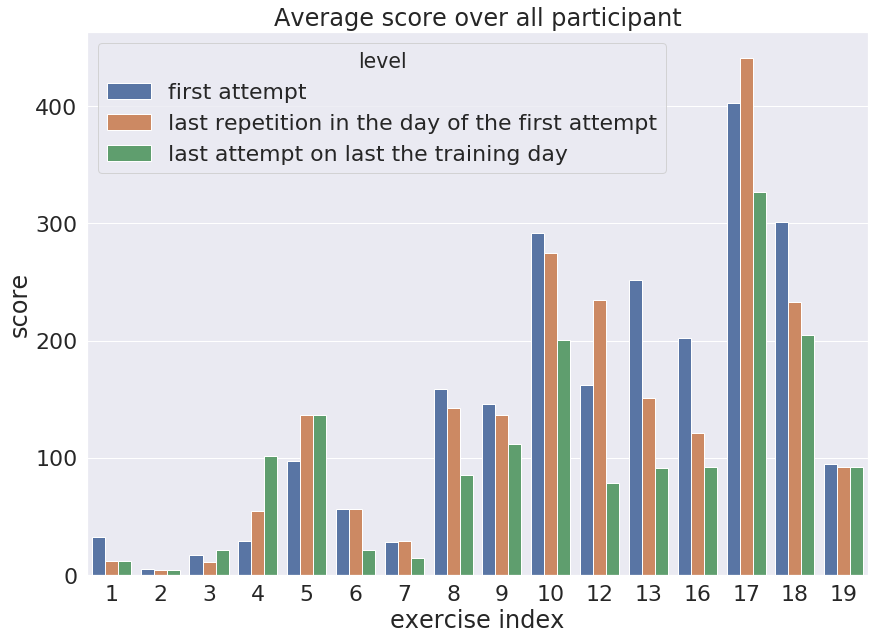

In [58]:
sns.set_style('whitegrid')
sns.set(font_scale=2)
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_6_3,ci=0)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')


## Reset index

In [59]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_3_nnp[df_6_3_nnp['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,level,score
6,1.5|5.1,first attempt,28.668774
6,1.5|5.1,last repetition in the day of the first attempt,29.032267
6,1.5|5.1,last attempt on the last training day,14.424225
7,2.1|5.2,first attempt,158.991648
7,2.1|5.2,last repetition in the day of the first attempt,142.615086
7,2.1|5.2,last attempt on the last training day,85.656987
8,2.2|5.3,first attempt,145.902881
8,2.2|5.3,last repetition in the day of the first attempt,136.330610
8,2.2|5.3,last attempt on the last training day,112.157779
9,2.3|5.4,first attempt,291.503817


## Draw diagram

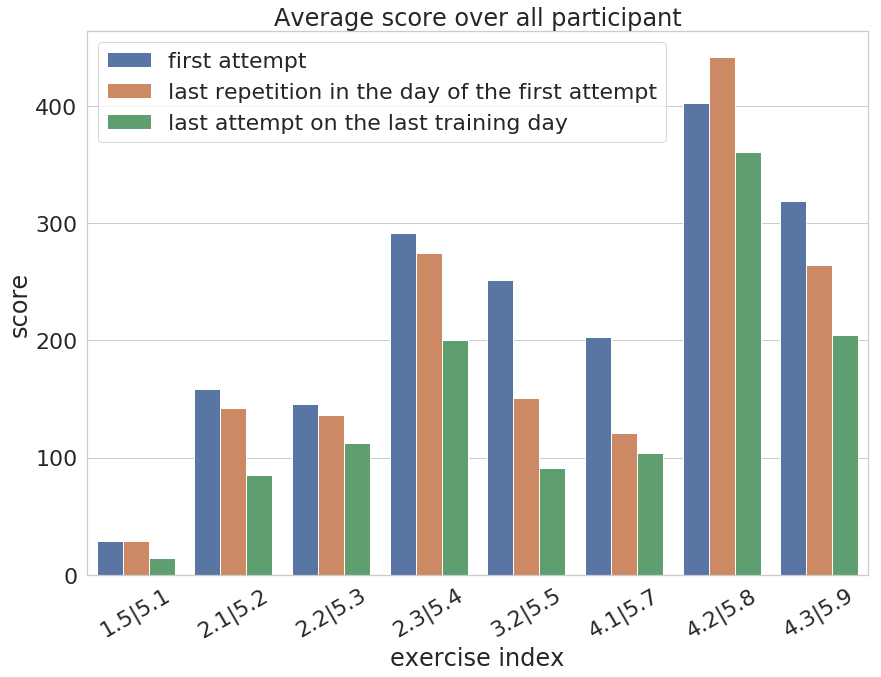

In [64]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_tmp)
ax.set_title('Average score over all participant')
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_with_title.png", bbox_inches='tight')


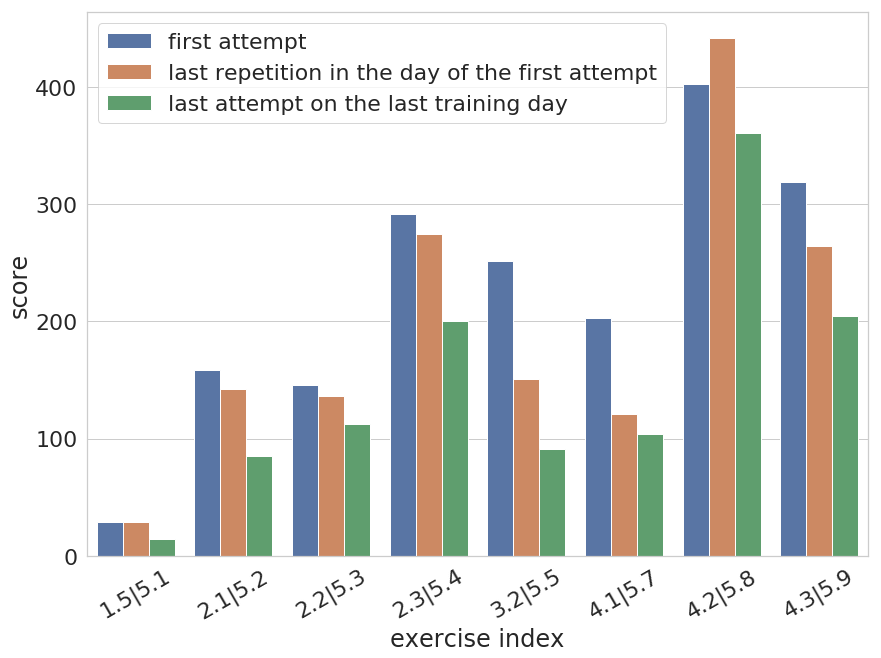

In [61]:
sns.set_style('whitegrid')

f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="score", hue='level', data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_3_reorder_average_score_over_all_participator_without_title.png", bbox_inches='tight')

# Diagram 2: Whisker box for diagram 1

## Data processing

In [41]:
df_6_4 = df[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4_nnp = df_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_6_4 = df_6_4.reset_index()
df_6_4_nnp = df_6_4_nnp.reset_index()

first_attempt = df_6_4.groupby(['exc_num', 'uid']).head(1)
first_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).head(1)
first_attempt = first_attempt.reset_index()
first_attempt_nnp = first_attempt_nnp.reset_index()

last_attempt = df_6_4.groupby(['exc_num', 'uid']).tail(1)
last_attempt_nnp = df_6_4_nnp.groupby(['exc_num', 'uid']).tail(1)
last_attempt = last_attempt.reset_index()
last_attempt_nnp = last_attempt_nnp.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on the last training day'

first_attempt_nnp['level'] = 'first attempt'
last_attempt_nnp['level'] = 'last attempt on the last training day'

cols = ['uid', 'day', 'exc_num', 'level', 'score']
df_6_4 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_4_nnp = pd.concat([first_attempt_nnp[cols], last_attempt_nnp[cols]])

## Reset index 

In [42]:
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_4_nnp[df_6_4_nnp['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,uid,day,exc_num,level,score
46,1,1,1.5|5.1,first attempt,24.645426
47,2,1,1.5|5.1,first attempt,19.646378
48,3,1,1.5|5.1,first attempt,42.763786
49,4,1,1.5|5.1,first attempt,18.883096
50,5,1,1.5|5.1,first attempt,36.812447
51,6,1,1.5|5.1,first attempt,43.217241
52,7,1,1.5|5.1,first attempt,22.786913
53,8,1,1.5|5.1,first attempt,28.336407
54,10,1,1.5|5.1,first attempt,21.489916
55,11,1,1.5|5.1,first attempt,28.106126


## draw diagram 

No handles with labels found to put in legend.


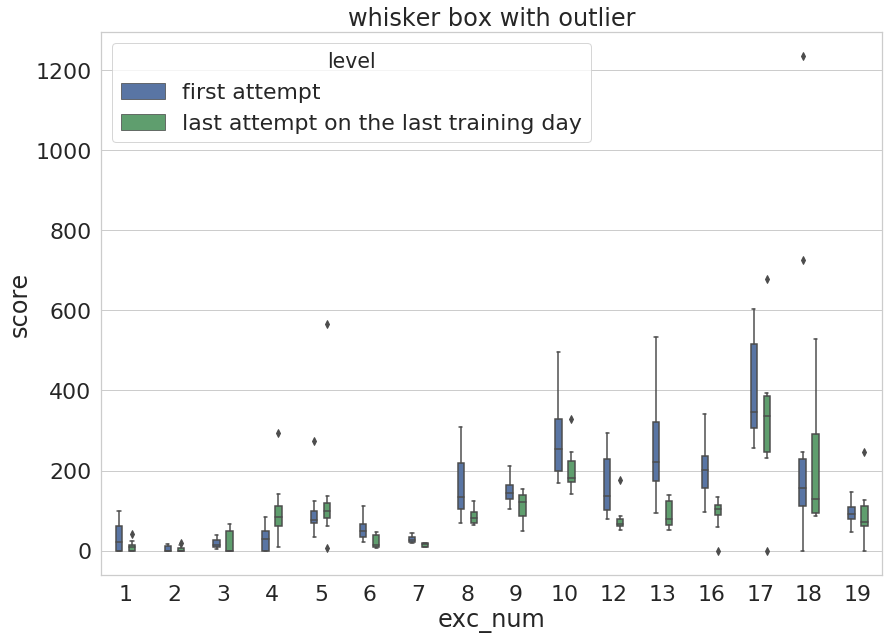

In [45]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
plt.gca().legend().set_title('')
ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_6_4).set_title('whisker box with outlier')

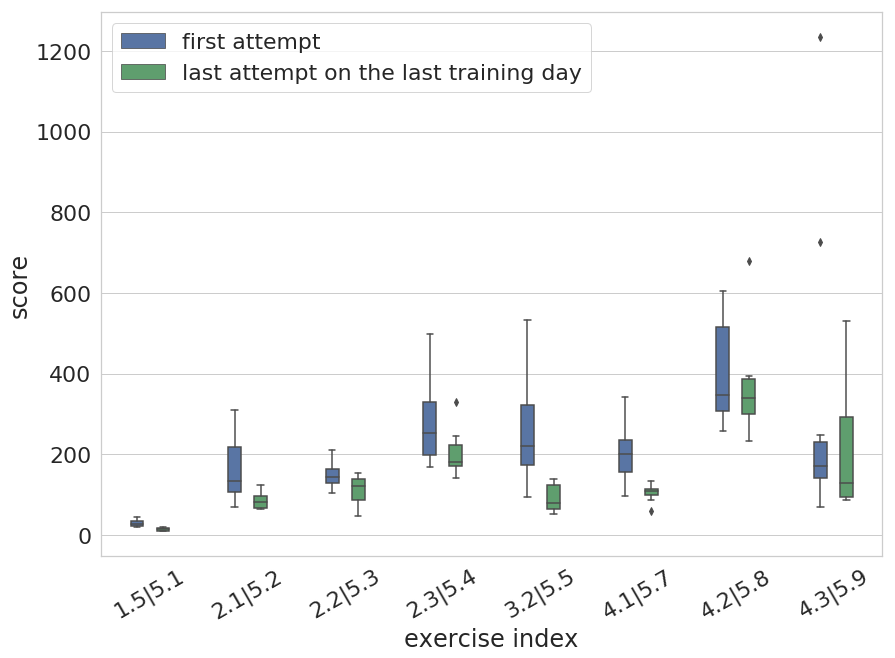

In [46]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_without_title.png", bbox_inches='tight')

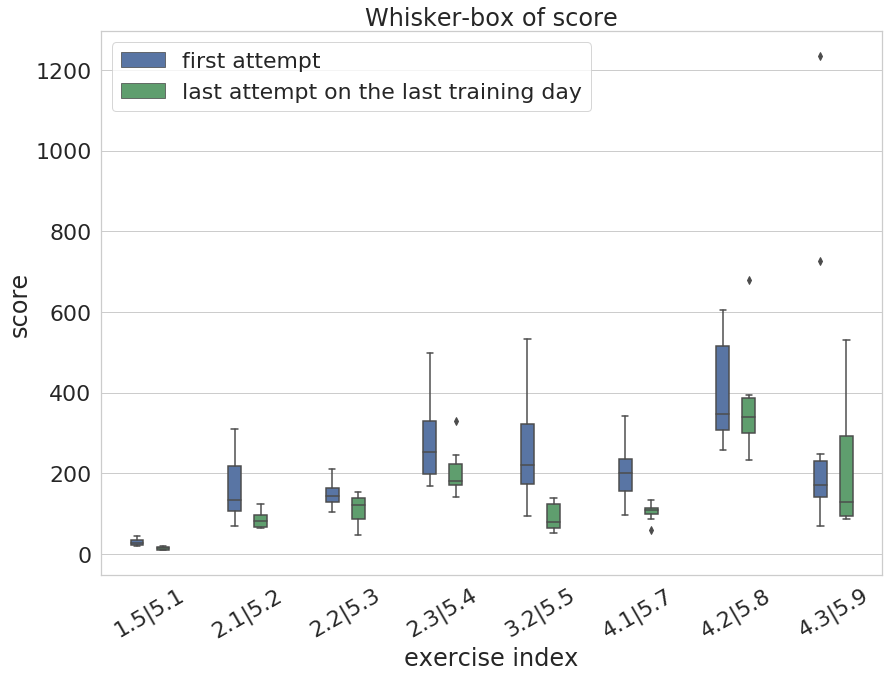

In [47]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_title('Whisker-box of score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with_title.png", bbox_inches='tight')

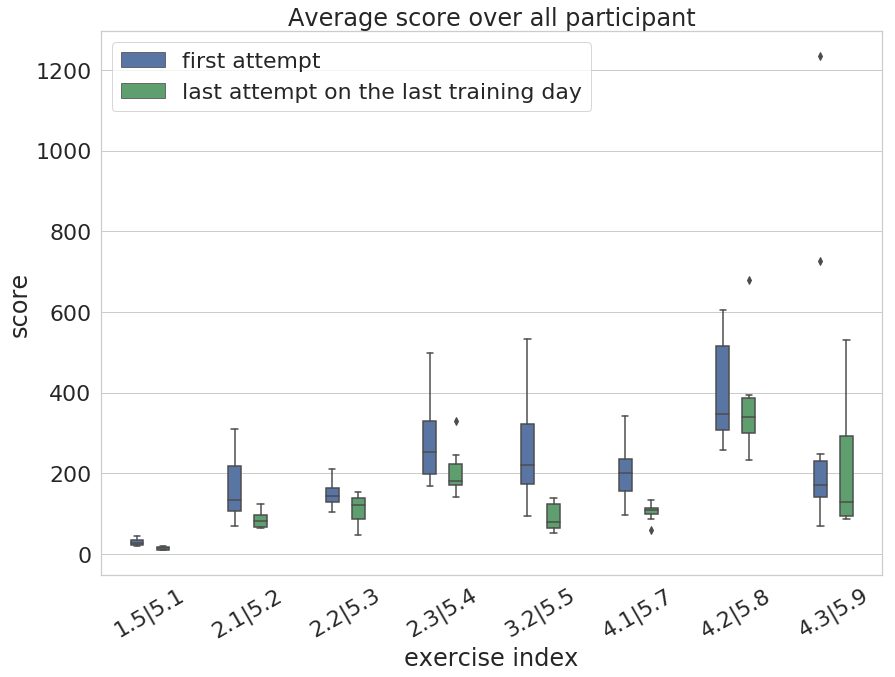

In [48]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.boxplot(x="exc_num", y="score", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index')
ax.set_title('Average score over all participant')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig_6_4_whisker_box_score_with)same_title.png", bbox_inches='tight')

# Diagram 3 Timing Measurements

## Load dataset

In [125]:
dir = '../data/'
filenames = ['tag 1', 'tag 2', 'tag 3', 'tag 4', 'tag 5']
# init 
exc_content = {}
is_part = False
b_get_csv = False
df = pd.DataFrame([], columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])

for filename in filenames:
    filename = dir+filename
    with open(filename, 'r') as f:
        for line in f:
            b_get_csv = False
            if line.startswith('tag'):
                p_day = '(^tag )(\d+)'
                result = re.match(p_day, line)
                day = result.groups()[1]
                week = None
                uid = None
                start_time = None
                
            elif line.startswith('HEiKA'):
                p_uid = '(^HEiKA)(\d*)'
                result = re.match(p_uid, line)
                uid = result.groups()[1]
            elif line.startswith('start_time'):
                p_start_time = '(^start_time: )(.*)'
                result = re.match(p_start_time, line)
                start_time = result.groups()[1]
  
            elif line.startswith('e'):
                p_exc = '(^e)(\d*)(.)(.*)'
                result = re.match(p_exc, line)
                char = result.groups()[2]
                num = result.groups()[1]
                if char == ':':
                    content = result.groups()[3][1:]
                    exc_content[num] = content

                elif char == ' ':
                    b_get_csv = True
                    exc_num = num
                    infos = result.groups()[3].split(' ')
                    if infos[1].startswith('part'):
                        is_part = True
                        exc_times = infos[0][1:]
                        part_num = infos[1][-2]
                        s_time = time_to_sec(infos[2])
                        e_time = time_to_sec(infos[4])

                    else:
                        is_part = False
                        exc_times = infos[0][1:-1]
                        s_time = time_to_sec(infos[1])
                        e_time = time_to_sec(infos[3])
                        
            if b_get_csv:
                row = [uid, day, exc_num, exc_times, e_time-s_time]
                df_tmp = pd.DataFrame(np.array(row).reshape(1,-1),columns=['uid', 'day', 'exc_num', 'exc_times', 'running_time'])
                df = pd.concat([df, df_tmp], axis=0)
                
# df.to_csv('../data/running_time.csv', index=False)
# df = pd.read_csv('../data/running_time.csv')


## Data processing

In [66]:
df_6_5 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_5 = df_6_5.reset_index()

first_attempt = df_6_5.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_5.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_5.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt = first_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
first_attempt = first_attempt.reset_index()

last_attempt = last_attempt[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_attempt = last_attempt.reset_index()

last_repetition = last_repetition[['exc_num', 'running_time']].groupby(['exc_num']).mean()
last_repetition = last_repetition.reset_index()

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on last training day'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['exc_num', 'level', 'running_time']
df_6_5 = pd.concat([first_attempt[cols], last_repetition[cols], last_attempt[cols]])
df_6_5

,exc_num,level,running_time
0,1,first attempt,76.666667
1,2,first attempt,55.500000
2,3,first attempt,73.200000
3,4,first attempt,134.200000
4,5,first attempt,83.000000
5,6,first attempt,48.900000
6,7,first attempt,46.000000
7,8,first attempt,107.800000
8,9,first attempt,118.900000
9,10,first attempt,127.100000


## Reset index

In [68]:
# selector = [[12, "3.1|5.1"], [7, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [14, "3.3|5.7"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]
selector = [[7, "1.5|5.1"],[8,"2.1|5.2"], [9, "2.2|5.3"], [10, "2.3|5.4"], [13, "3.2|5.5"], [14, "3.3|5.6"], [16, "4.1|5.7"], [17,"4.2|5.8"], [18, "4.3|5.9"]]

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_5[df_6_5['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,exc_num,level,running_time
6,1.5|5.1,first attempt,46.0
6,1.5|5.1,last repetition in the day of the first attempt,57.1
6,1.5|5.1,last attempt on last training day,57.1
7,2.1|5.2,first attempt,107.8
7,2.1|5.2,last repetition in the day of the first attempt,95.6
7,2.1|5.2,last attempt on last training day,85.2
8,2.2|5.3,first attempt,118.9
8,2.2|5.3,last repetition in the day of the first attempt,84.2
8,2.2|5.3,last attempt on last training day,78.4
9,2.3|5.4,first attempt,127.1


## Draw diagram

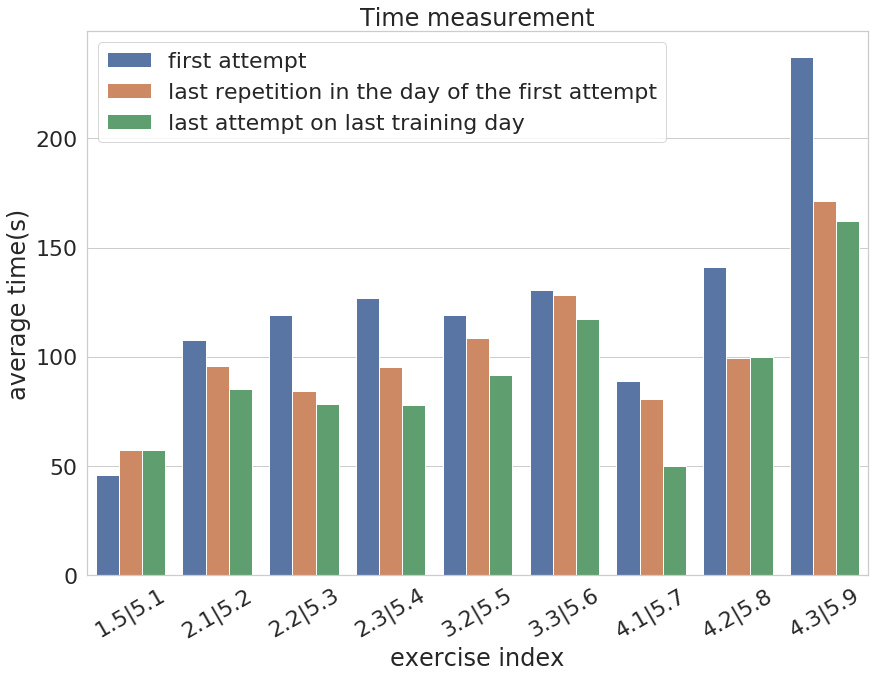

In [69]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_tmp)

ax.set_title('Time measurement')
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_with_title.png", bbox_inches='tight')

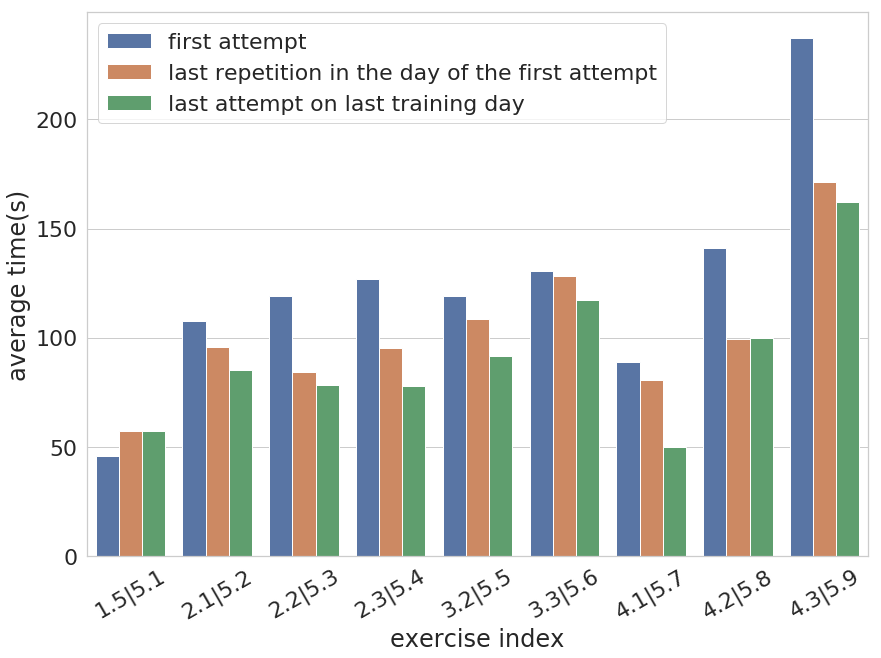

In [70]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="exc_num", y="running_time", hue='level', data=df_tmp)
ax.set(xlabel='exercise index', ylabel='average time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_3_average_time_over_all_participator_without_title.png", bbox_inches='tight')

# Diagram 4: Whisker box for diagram 3

## Data processing

In [74]:
df_6_6 = df.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_6_6 = df_6_6.reset_index()

first_attempt = df_6_6.groupby(['uid', 'exc_num']).head(1)
first_attempt = first_attempt.reset_index()

last_attempt = df_6_6.groupby(['uid','exc_num']).tail(1)
last_attempt = last_attempt.reset_index()


last_repetition = df_6_6.merge(first_attempt, on=['uid', 'day', 'exc_num'], how='inner')
last_repetition = last_repetition.groupby(['uid', 'exc_num']).tail(1)
last_repetition = last_repetition.drop(['index', 'exc_times_x', 'exc_times_y', 'running_time_y'], axis=1)
last_repetition.columns = ['uid', 'day', 'exc_num', 'running_time']

first_attempt['level'] = 'first attempt'
last_attempt['level'] = 'last attempt on the last training day'
last_repetition['level'] = 'last repetition in the day of the first attempt'

cols = ['uid', 'exc_num', 'level', 'running_time']
df_6_6 = pd.concat([first_attempt[cols], last_attempt[cols]])
df_6_6

,uid,exc_num,level,running_time
0,1,1,first attempt,108.0
1,1,2,first attempt,59.0
2,1,3,first attempt,83.0
3,1,4,first attempt,139.0
4,1,5,first attempt,111.0
5,1,6,first attempt,64.0
6,1,8,first attempt,94.0
7,1,9,first attempt,111.0
8,1,10,first attempt,122.0
9,1,11,first attempt,552.0


## Reset index

In [75]:
selector = [[12, "3.1|5.1"], [7, "1.8|5.2"],[8,"2.1|5.3"], [9, "2.2|5.4"], [10, "2.3|5.5"], [13, "3.2|5.6"], [14, "3.3|5.7"], [16, "4.1|5.8"], [17,"4.2|5.9"], [18, "4.3|5.10"]]
df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = df_6_6[df_6_6['exc_num']==num]
    df_curr['exc_num'] = string
    df_tmp = pd.concat([df_tmp, df_curr])
    
df_tmp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,uid,exc_num,level,running_time
10,1,3.1|5.1,first attempt,184.0
29,2,3.1|5.1,first attempt,202.0
48,3,3.1|5.1,first attempt,253.0
69,4,3.1|5.1,first attempt,103.0
86,5,3.1|5.1,first attempt,95.0
105,6,3.1|5.1,first attempt,92.0
124,7,3.1|5.1,first attempt,169.0
143,8,3.1|5.1,first attempt,104.0
161,10,3.1|5.1,first attempt,96.0
180,11,3.1|5.1,first attempt,73.0


## Draw diagram

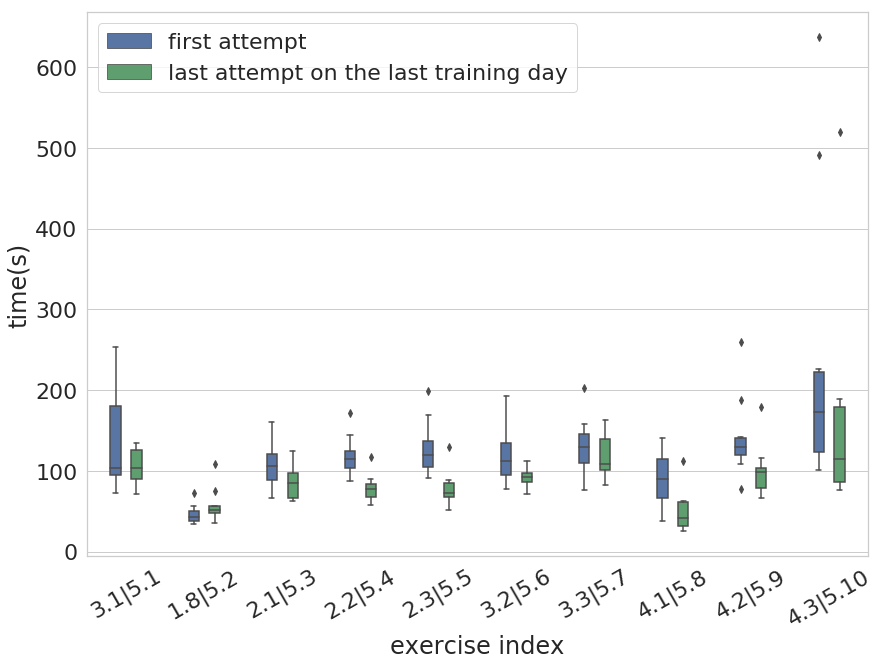

In [76]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time.png", bbox_inches='tight')

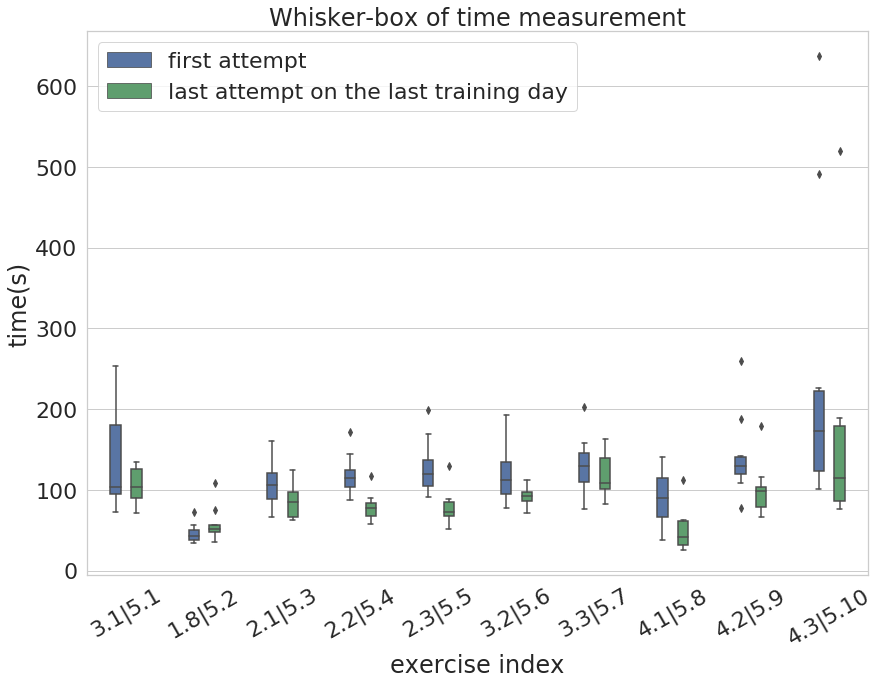

In [78]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_title('Whisker-box of time measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_title.png", bbox_inches='tight')

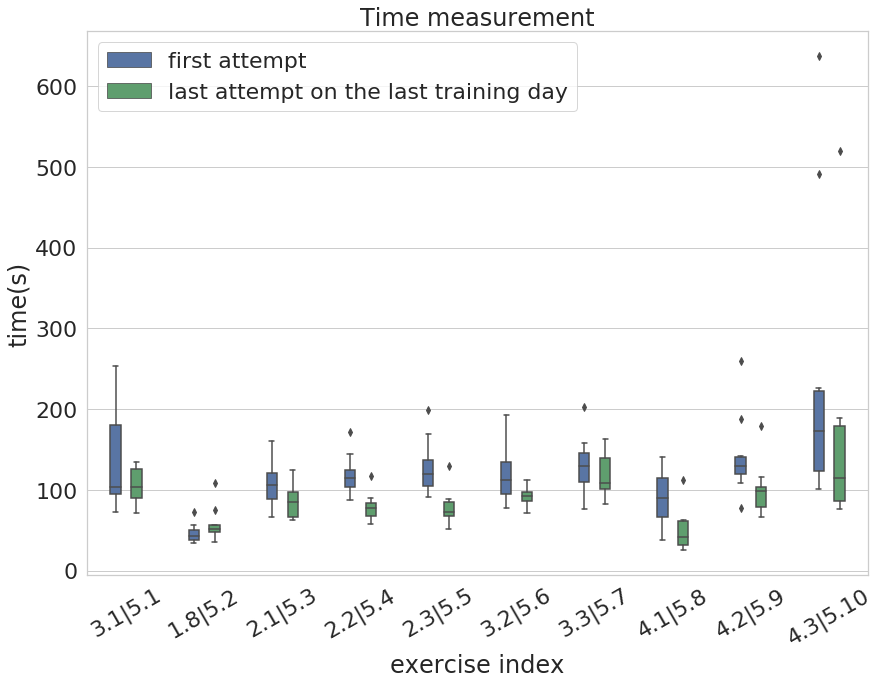

In [79]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

# ax = sns.boxplot(x="exc_num", y="running_time", hue='level', data=df_6_6)

ax = sns.boxplot(x="exc_num", y="running_time", hue='level',hue_order=['first attempt', '', 'last attempt on the last training day'], width=0.4, data=df_tmp)
ax.set(xlabel='exercise index', ylabel='time(s)')
ax.set_title('Time measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_6_whisker_box_time_with_same_title.png", bbox_inches='tight')

# Diagram 5: Correlation between score and time

## Data processing

In [36]:
df_score = pd.read_csv('../data/all_data.csv')
df_score = calc_force(df_score)
df_score = calc_velocity(df_score)
df_score = calc_score(df_score)
df_score = df_score.drop(['left', 'right', 'Fx', 'Fy', 'Fz', 'Mx', 'My', 'Mz','Fx.1', 'Fy.1', 'Fz.1', 
                      'Mx.1', 'My.1', 'Mz.1','Lx', 'Ly', 'Lz', 'Ax', 'Ay', 'Az'], axis=1)
df_score_nnp = df_score.dropna()

df_score = df_score[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score_nnp = df_score_nnp[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day', 'exc_num', 'exc_times', 'uid']).sum()
df_score = df_score.reset_index()
df_score_nnp = df_score_nnp.reset_index() 
df_score
df_time = pd.read_csv('../data/running_time.csv')
df_time = df_time.groupby(['uid', 'day', 'exc_num', 'exc_times']).sum()
df_time = df_time.reset_index()

df_6_7 = df_time.merge(df_score, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7 = df_6_7[['uid', 'running_time', 'score']]
df_6_7_nnp = df_time.merge(df_score_nnp, on=['uid', 'day', 'exc_num', 'exc_times'], how='inner')
df_6_7_nnp = df_6_7_nnp[['uid', 'running_time', 'score']]
df_6_7_nnp.head()

,uid,running_time,score
0,1,108.0,21.747808
1,1,78.0,14.700025
2,1,72.0,9.963524
3,1,83.0,6.354035
4,1,78.0,6.829834


## Draw diagram

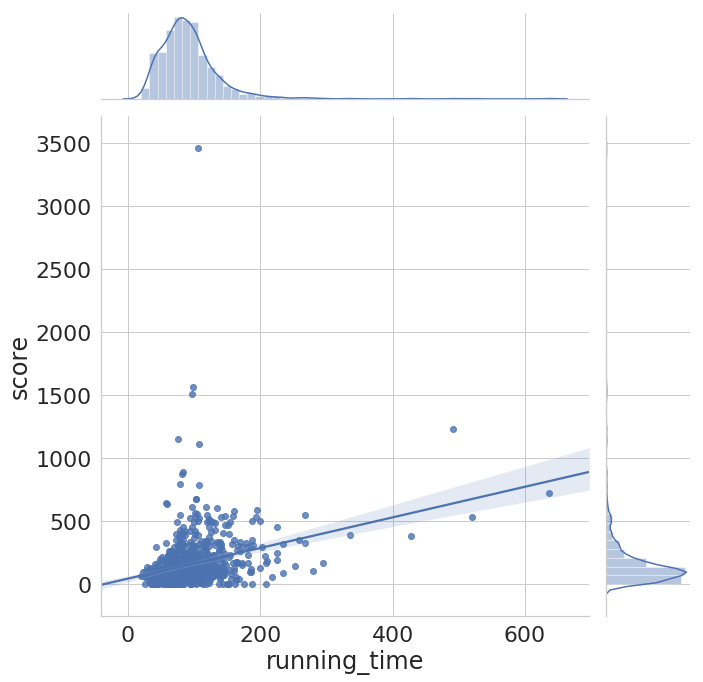

In [37]:
# sns.set_style('whitegrid')
# f, ax= plt.subplots(figsize = (14, 10))

# g  = sns.jointplot(x="running_time", y="score", data=df_6_7, kind="reg")
g = sns.JointGrid(x="running_time", y="score", data=df_6_7, height=10)
g = g.plot(sns.regplot, sns.distplot)

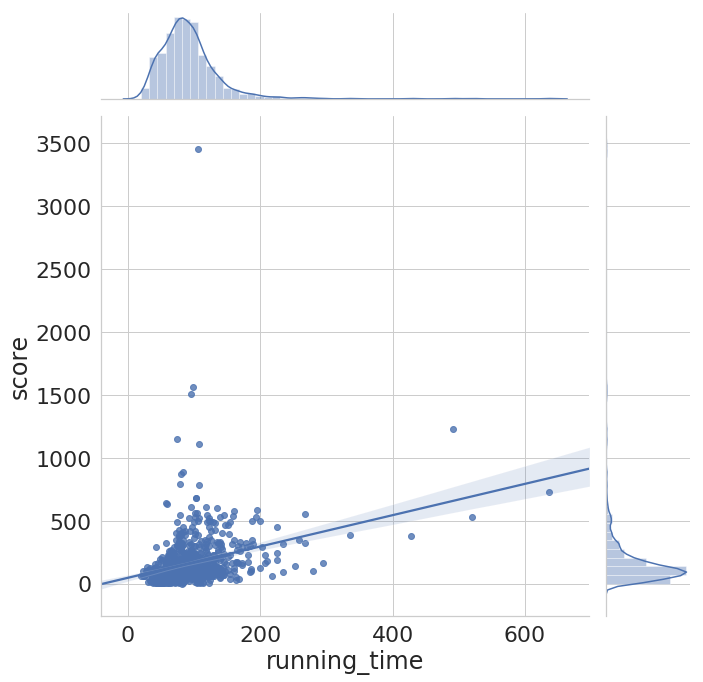

In [38]:
g = sns.JointGrid(x="running_time", y="score", data=df_6_7_nnp, height=10)
g = g.plot(sns.regplot, sns.distplot)

# Diagram 5: Exercise with and without force 

## Data processing

In [143]:
# exercise 3: line without force
# exercise 6: line with force
df_6_8 = df_nnp[(df_nnp['exc_num']==3) | (df_nnp['exc_num']==6)]
df_6_8_velocity = df_6_8[['uid', 'velocity']].groupby(['uid']).mean()
df_6_8_score = df_6_8[['day', 'exc_num', 'exc_times', 'uid', 'score']].groupby(['day','exc_num', 'exc_times', 'uid']).sum()
df_6_8_score = df_6_8_score.reset_index()
df_6_8_score = df_6_8_score[['uid', 'exc_num', 'score']].groupby(['uid', 'exc_num']).mean()
df_6_8_score = df_6_8_score.reset_index()
df_6_8 = df_6_8_score.merge(df_6_8_velocity, on=['uid'], how='inner')
df_6_8 = df_6_8.reset_index()
df_6_8 = df_6_8.sort_values('velocity')
df_6_8['velocity'] = df_6_8['velocity'].apply(lambda x: round(x, 2))
df_6_8['uid'] = df_6_8['uid'].astype('str').apply(lambda x: x.zfill(3))
df_6_8['x_axis'] = df_6_8['velocity'].astype('str')
df_6_8['x_axis'] = df_6_8['x_axis'] + '(' + df_6_8['uid'] + ')'

df_6_8['exc_num'][df_6_8['exc_num']==3] = 'without force'
df_6_8['exc_num'][df_6_8['exc_num']==6] = 'with force'
df_6_8['Exercise'] = df_6_8['exc_num']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Draw diagram

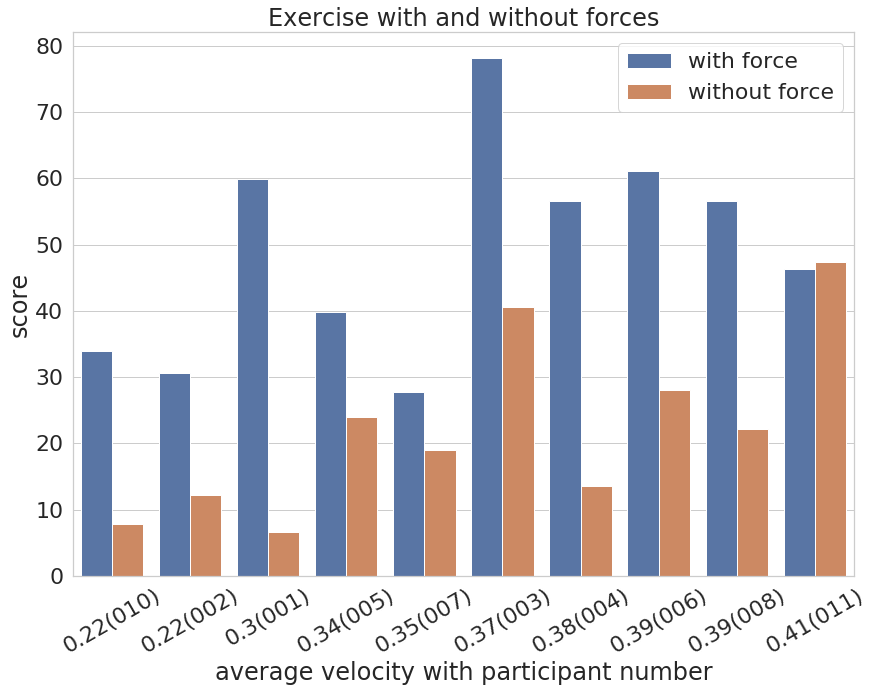

In [148]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', data=df_6_8)
ax.set_title('Exercise with and without forces')
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_with_title.png", bbox_inches='tight')


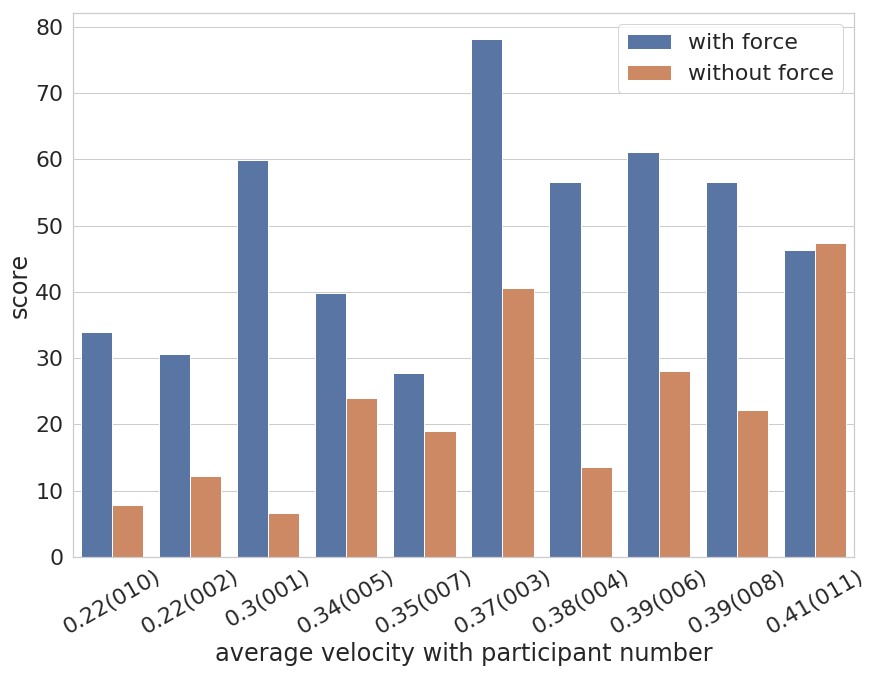

In [150]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="score", hue='Exercise', data=df_6_8)
ax.set(xlabel='average velocity with participant number', ylabel='score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_average_score_c5_without_title.png", bbox_inches='tight')


# Diagram 6: Assessment of every exercises

## Data processing

In [99]:

df = pd.read_csv('../data/DATA.csv', header=1)
all_columns = df.columns
time_columns = []
assessment_columns = []
for c in all_columns:
    if 'time' in c:
        time_columns.append(c)
    elif 'question' in c:
        assessment_columns.append(c)
        
df = df[['Subject_ID']+assessment_columns]
new_df = pd.DataFrame()
for c in assessment_columns:
    df_tmp = df[['Subject_ID', c]]
    df_curr = pd.DataFrame([], columns=['uid', 'day', 'task', 'question', 'assessment'])
    
    p = '(^day)(\d)(\_)(task|end)(\d*)(\_)(question)(\d)'
    result = re.match(p, c)
    day = result.groups()[1]
    task = result.groups()[4]
    if task == '':
        task = '0'
    question = result.groups()[7]
    
    df_curr['uid'] = df['Subject_ID']
    df_curr['day'] = day
    df_curr['task'] = task
    df_curr['question'] = question
    df_curr['assessment'] = df_tmp[c].apply(lambda x: x[0])
    
    new_df = pd.concat([new_df, df_curr])
    
new_df = new_df[new_df['assessment']!='.']
# new_df.to_csv('../data/assessment.csv', index=False)

# df = pd.read_csv('../data/assessment.csv') # """
# df.head()

,uid,day,task,question,assessment
0,Heika_001 ...,1,3,1,2
1,Heika_002 ...,1,3,1,1
2,Heika_003 ...,1,3,1,1
3,Heika_004 ...,1,3,1,2
4,Heika_005 ...,1,3,1,1


## Exercise Selection

In [100]:
days_codes = ['d1\_e3', 'd1\_e4', 'd1\_e5', 'd1\_e6', 'd1\_e7', 'd2\_e2', 'd2\_e3',
              'd2\_e4', 'd3\_e1', 'd3\_e2', 'd3\_e3', 'd3\_e4', 'd3\_e5','d4\_e1', 'd4\_e2',
              'd4\_e3', 'd4\_e4', 'd5\_e1',  'd5\_e2', 'd5\_e3', 'd5\_e4', 'd5\_e5', 'd5\_e6',
              'd5\_e7', 'd5\_e8', 'd5\_e9', 'd5\_e10']
df_tmp = pd.DataFrame()
for code in days_codes:
    p = '(^d)(\d)(\\\_)(e)(\d*)'
    result = re.match(p, code)
    day = result.groups()[1]
    task = result.groups()[4]
    df_curr = df[(df['day'] == int(day)) & (df['task'] == int(task))]
    df_curr['x_axis'] = day+'.'+task
    df_tmp = pd.concat([df_tmp, df_curr])
    
average_ass = df_tmp[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).mean()
average_ass = average_ass.reset_index()
average_ass['x_axis'] = average_ass['day'].astype(str)+'.'+average_ass['task'].astype(str)



average_ass['question'][average_ass['question']==1] = 'Q. 1'
average_ass['question'][average_ass['question']==2] = 'Q. 2'
whisker_ass = df_tmp[['x_axis', 'question', 'assessment']]
whisker_ass['question'][whisker_ass['question']==1] = 'Q. 1'
whisker_ass['question'][whisker_ass['question']==2] = 'Q. 2'

average_ass = average_ass.sort_values(by=['day', 'task'])
index_order = average_ass['x_axis'].unique()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWa

## Reset index

In [122]:
selector = [[1.3, 1.1],[1.4,1.2], [1.5, 1.3], [1.6, 1.4], [1.7, 1.5], [2.2, 2.1], [2.3, 2.2], [2.4, 2.3]
           ,[3.2, 3.1], [3.3, 3.2], [3.4,3.3], [3.5,3.4], [4.2, 4.1], [4.3,4.2],[4.4, 4.3], [5.1,5.1],[5.2,5.2],[5.3,5.3],
           [5.4,5.4], [5.5,5.5],[5.6,5.6],[5.7,5.7],[5.8,5.8],[5.9,5.9], ["5.10", "5.10"]]
           

df_tmp = pd.DataFrame()
for element in selector:
    num, string = element
    df_curr = average_ass[average_ass['x_axis']==str(num)]
    df_curr['x_axis'] = str(string)
    df_tmp = pd.concat([df_tmp, df_curr])
    
# df_tmp
index_order = df_tmp['x_axis'].unique()
df_tmp.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,day,task,question,assessment,x_axis
0,1,3,Q. 1,1.900000,1.1
1,1,3,Q. 2,2.500000,1.1
2,1,4,Q. 1,2.300000,1.2
3,1,4,Q. 2,2.700000,1.2
4,1,5,Q. 1,2.400000,1.3
5,1,5,Q. 2,2.900000,1.3
6,1,6,Q. 1,2.500000,1.4
7,1,6,Q. 2,2.800000,1.4
8,1,7,Q. 1,2.100000,1.5
9,1,7,Q. 2,2.500000,1.5


## Draw diagram

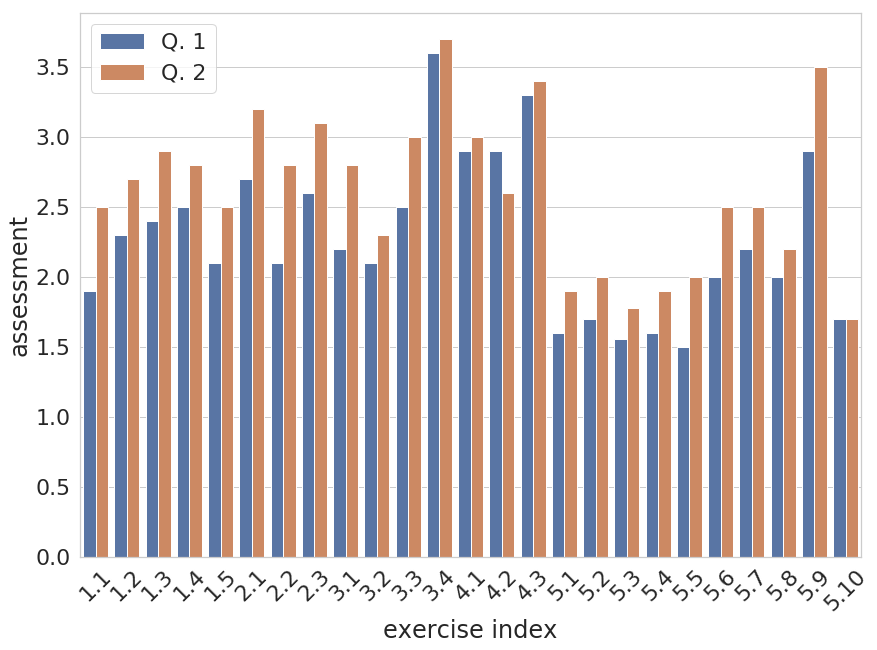

In [123]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_without_title.png", bbox_inches='tight')


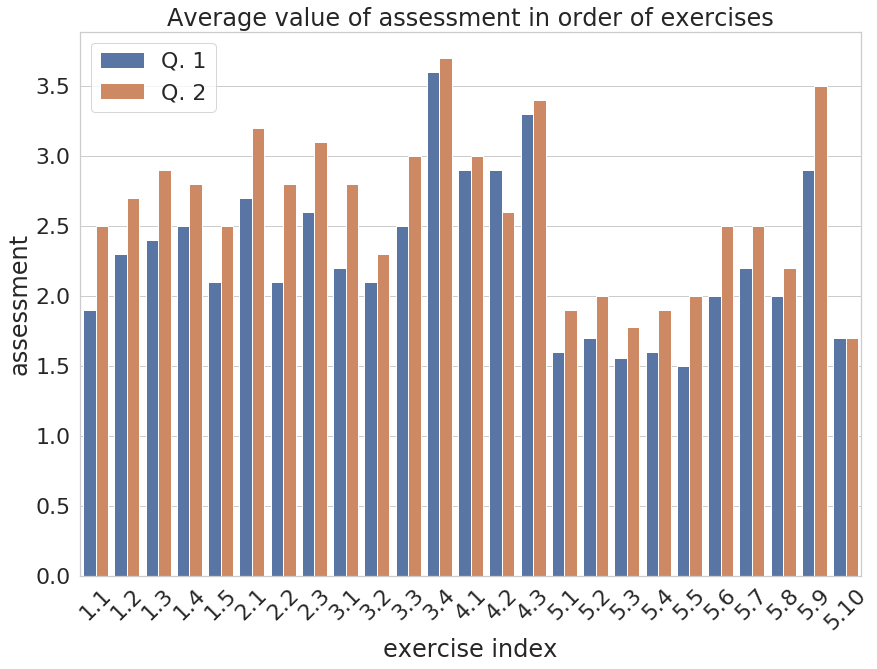

In [124]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=df_tmp, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of exercises')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_8_assessment_with_title.png", bbox_inches='tight')


# Diagram 7: Daily Assessment

## Data processing

In [49]:
day_ass = df[df['task'] == 0]
day_ass = day_ass[['day', 'question', 'assessment']].groupby(['day', 'question']).mean()
day_ass = day_ass.reset_index()
day_ass['question'] = 'Q. ' + day_ass['question'].astype(str)

## Draw diagram

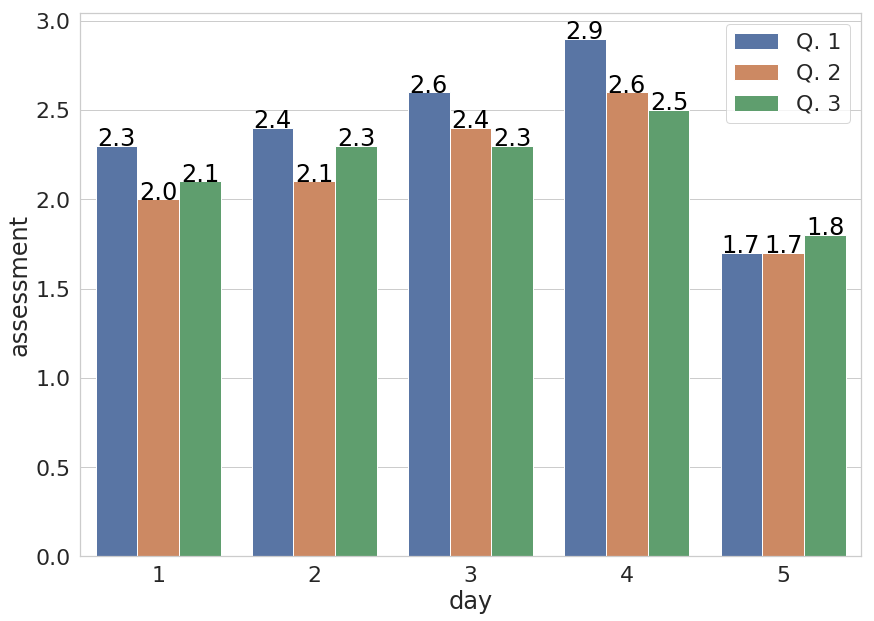

In [50]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

for index, row in day_ass.iterrows():
    ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
    i+=1
    i = i%len(que_index)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_without_title.png")

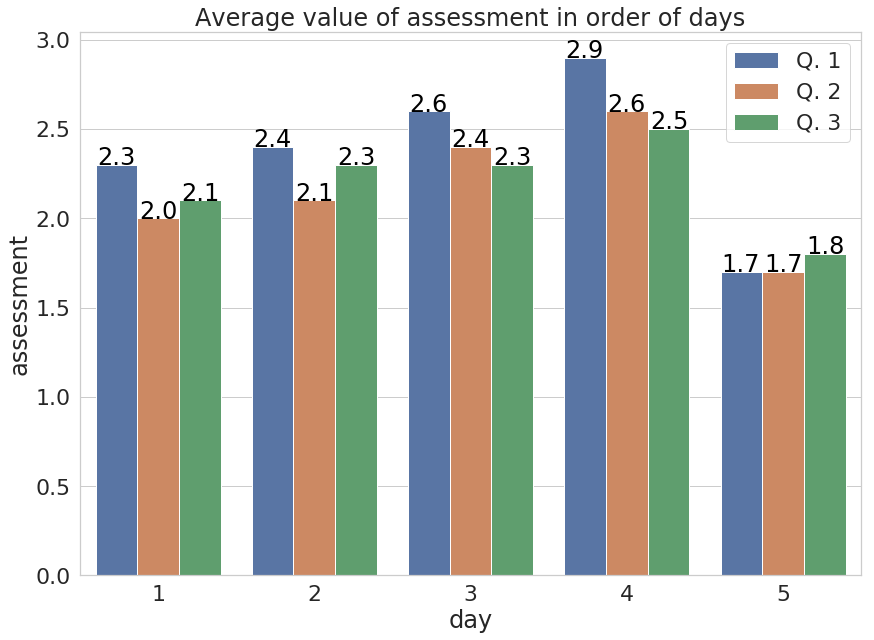

In [51]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="day", y="assessment", hue='question', data=day_ass)
ax.set(xlabel='day', ylabel='assessment')
que_index = [-1.27, -1 , -0.73]
i = 0

for index, row in day_ass.iterrows():
    ax.text(row.day+que_index[i],row.assessment, row.assessment, color='black', ha="center")
    i+=1
    i = i%len(que_index)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of assessment in order of days')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_9_day_assessment_with_title.png")

# Diagram 8: All assessment

## Data processing

In [52]:

cols = ['day', 'task', 'question', 'assessment', 'x_axis']

all_average_ass = df[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).mean()
all_average_ass = all_average_ass.reset_index()
all_average_ass['x_axis'] = all_average_ass['day'].astype(str) + '.' + all_average_ass['task'].astype(str)
all_average_ass = all_average_ass[cols]
all_average_ass['question'] = 'Q. ' + all_average_ass['question'].astype(str)

all_std_ass = df[['day', 'task', 'question', 'assessment']].groupby(['day', 'task', 'question']).std()
all_std_ass = all_std_ass.reset_index()
all_std_ass['x_axis'] = all_std_ass['day'].astype(str) + '.' + all_std_ass['task'].astype(str)
all_std_ass = all_std_ass[cols]
all_std_ass['question'] = 'Q. ' + all_std_ass['question'].astype(str)

all_average_ass = all_average_ass.sort_values(by=['day', 'task'])
index_order = all_average_ass['x_axis'].unique()

## Draw diagram

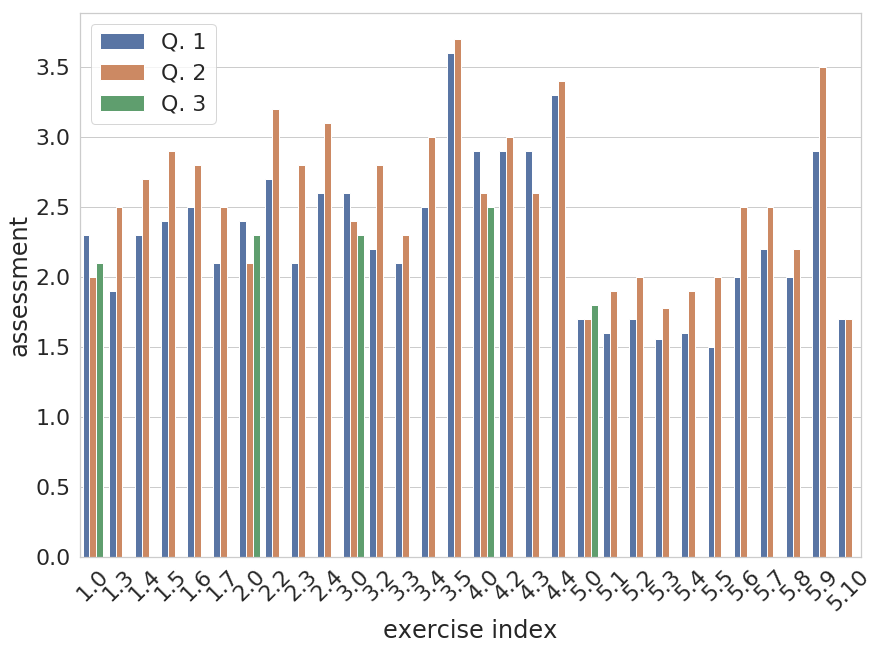

In [53]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_without_title.png", bbox_inches='tight')

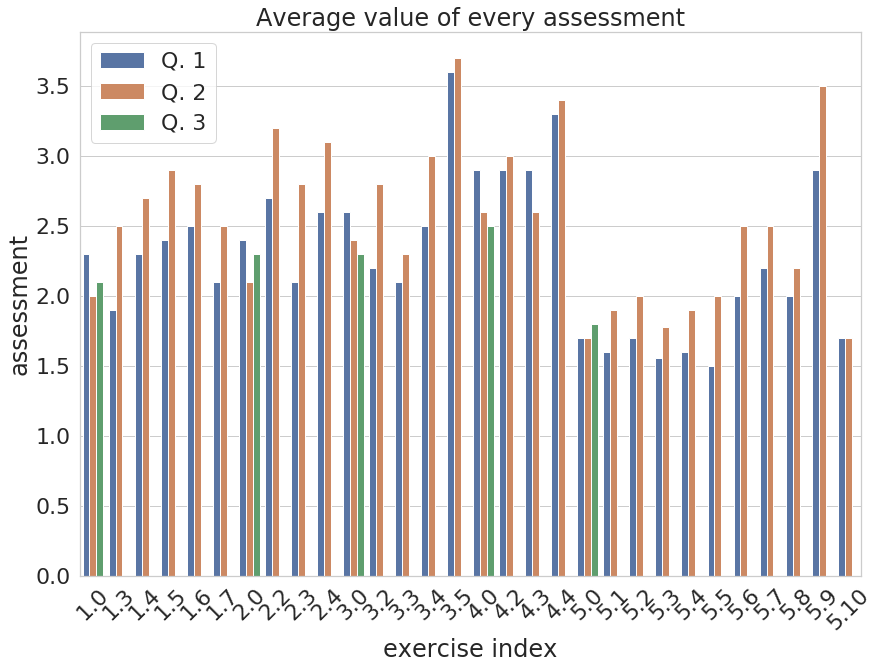

In [54]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_average_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Average value of every assessment')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_avg_assessment_with_title.png", bbox_inches='tight')

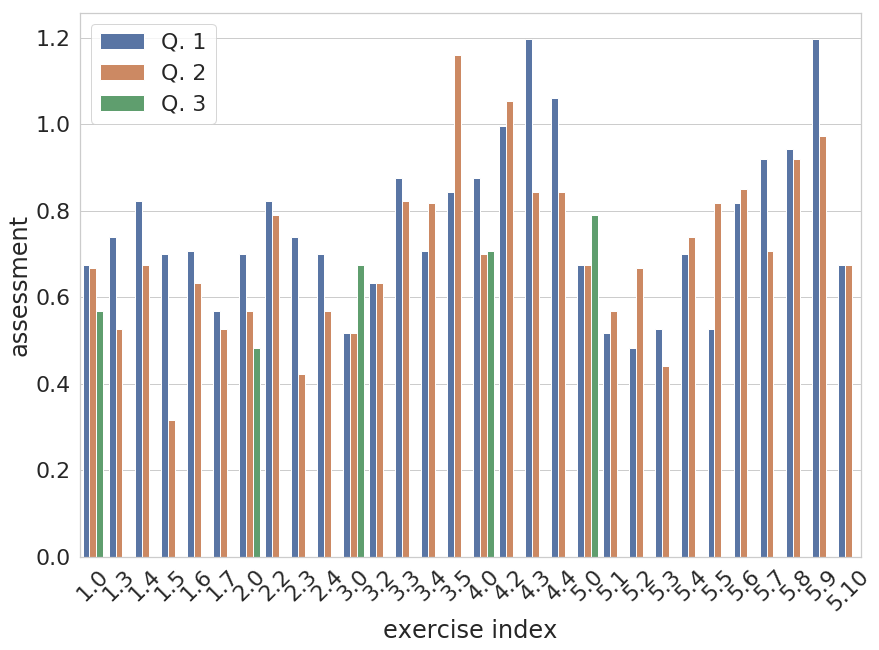

In [55]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_std_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_cov_assessment_without_title.png", bbox_inches='tight')

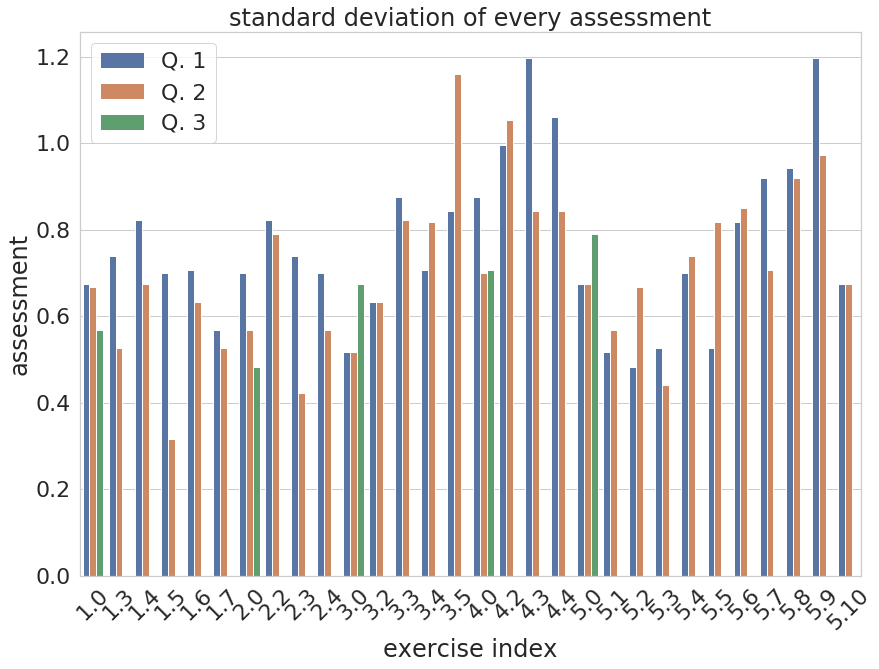

In [56]:
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))

ax = sns.barplot(x="x_axis", y="assessment", hue='question', data=all_std_ass, order=index_order)
ax.set(xlabel='exercise index', ylabel='assessment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('standard deviation of every assessment')
plt.gca().legend().set_title('')
plt.savefig("../data/figure/fig6_10_all_cov_assessment_with_title.png", bbox_inches='tight')